In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates
# %%

In [2]:
fldr = 'E:\\data\\dunex\\Dunex_Sig_OC\\1137sig_bar\\Exported Data\\S102410A008_outersurf\\'

In [3]:
fn = 'Burst.VTC.WAVES_20min.nc'

In [4]:
fin=fldr+fn

In [5]:
fin

'E:\\data\\dunex\\Dunex_Sig_OC\\1137sig_bar\\Exported Data\\S102410A008_outersurf\\Burst.VTC.WAVES_20min.nc'

In [6]:
WVS = xr.open_dataset(fin,group = "/Data/Waves",engine = "netcdf4")

In [7]:
WVS

<xarray.Dataset>
Dimensions:                               (ASTSpectra_Direction: 90, ASTSpectra_Frequency: 98, DirectionalSpectra_Frequency: 98, EnergySpectra_Frequency: 98, FourierCoefficients_Frequency: 98, FrequencyDiagram_Frequency: 98, FullWaveDirectionalSpectra_Direction: 90, FullWaveDirectionalSpectra_Frequency: 98, PressureSpectra_Direction: 90, PressureSpectra_Frequency: 98, VelocitySpectra_Direction: 90, VelocitySpectra_Frequency: 98, WaveSpectra_Frequency: 98, time: 2769)
Coordinates:
  * time                                  (time) datetime64[ns] 2021-09-13T10...
  * EnergySpectra_Frequency               (EnergySpectra_Frequency) float64 0...
  * FrequencyDiagram_Frequency            (FrequencyDiagram_Frequency) float64 ...
  * FourierCoefficients_Frequency         (FourierCoefficients_Frequency) float64 ...
  * WaveSpectra_Frequency                 (WaveSpectra_Frequency) float64 0.0...
  * DirectionalSpectra_Frequency          (DirectionalSpectra_Frequency) float64 ...
  * FullWaveDirectionalSpectra_Frequency  (FullWaveDirectionalSpectra_Frequency) float64 ...
  * FullWaveDirectionalSpectra_Direction  (FullWaveDirectionalSpectra_Direction) float64 ...
  * ASTSpectra_Frequency                  (ASTSpectra_Frequency) float64 0.02...
  * ASTSpectra_Direction                  (ASTSpectra_Direction) float64 0.0 ...
  * PressureSpectra_Frequency             (PressureSpectra_Frequency) float64 ...
  * PressureSpectra_Direction             (PressureSpectra_Direction) float64 ...
  * VelocitySpectra_Frequency             (VelocitySpectra_Frequency) float64 ...
  * VelocitySpectra_Direction             (VelocitySpectra_Direction) float64 ...
Data variables:
    Status_Missing_Data                   (time) int8 ...
    Status_No_Pressure                    (time) int8 ...
    Status_Low_Pressure                   (time) int8 ...
    Status_Amplitude                      (time) int8 ...
    Status_White_Noise                    (time) int8 ...
    Status_Unreasonable_Estimate          (time) int8 ...
    Status_Never_Processed                (time) int8 ...
    Status_AST_Out_Of_Bounds              (time) int8 ...
    Status_Direction_Ambiguity            (time) int8 ...
    Status_Pressure_Peak                  (time) int8 ...
    Status_Close_to_Clip                  (time) int8 ...
    Status_AST_Loss_High                  (time) int8 ...
    Status_High_Tilt                      (time) int8 ...
    Status_Correlation                    (time) int8 ...
    TargetCell                            (time) float32 ...
    SpectrumType                          (time) float32 ...
    SurfaceDetection_None                 (time) float32 ...
    SurfaceDetection_Bad                  (time) float32 ...
    FrequencyAmbiguityLimit               (time) float32 ...
    ProcessingTime                        (time) float32 ...
    ZeroCrossings                         (time) float32 ...
    Period_Tm02                           (time) float32 ...
    Period_Tp                             (time) float32 ...
    Period_Tenergy                        (time) float32 ...
    Period_Tmax                           (time) float32 ...
    Period_Tz                             (time) float32 ...
    Period_T10                            (time) float32 ...
    Period_T3                             (time) float32 ...
    Height_Hm0                            (time) float32 ...
    Height_Hmax                           (time) float32 ...
    Height_H10                            (time) float32 ...
    Height_H3                             (time) float32 ...
    Height_Hmean                          (time) float32 ...
    Direction_DirTp                       (time) float32 ...
    Direction_SprTp                       (time) float32 ...
    Direction_MeanDir                     (time) float32 ...
    UnidirectivityIndex                   (time) float32 ...
    CurrentSpeed                          (time) float32 ...
    CurrentDirection             

In [8]:
WVS.time[0]

<xarray.DataArray 'time' ()>
array('2021-09-13T10:10:00.000999936', dtype='datetime64[ns]')
Coordinates:
    time     datetime64[ns] 2021-09-13T10:10:00.000999936
Attributes:
    description:  Time of measurement

### Make Stack Plot of Wave stats for time period of good data

In [9]:
dtstart ="2021-09-14 19:01"
dtend = "2021-10-21 14:35"

In [10]:
# define some colors using palettes from ColorBrewer https://colorbrewer2.org/
grays = ['#f7f7f7','#cccccc','#969696','#636363','#252525']
blues = ['#eff3ff','#bdd7e7','#6baed6','#3182bd','#08519c']
greens = ['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c']
windcol = ['#edf8fb','#b3cde3','#8c96c6','#8856a7','#810f7c']
reds = ['#ffeda0','#feb24c','#f03b20']
divrg = ['#d7191c','#fdae61','#ffffbf','#abdda4','#2b83ba']

In [11]:
fig, (ax) = plt.subplots(4, 1, sharex=True, figsize=(16, 10))
ax[0].plot(WVS.sel(time=slice(dtstart, dtend)).time,
         WVS.sel(time=slice(dtstart, dtend)).Height_Hm0, color = divrg[0],label = 'Hm0')
ax[0].plot(WVS.sel(time=slice(dtstart, dtend)).time,
         WVS.sel(time=slice(dtstart, dtend)).Height_Hmax, color= divrg[1], label = 'Hmax')
ax[0].plot(WVS.sel(time=slice(dtstart, dtend)).time,
         WVS.sel(time=slice(dtstart, dtend)).Height_H10, color= divrg[4], label = 'H10')
ax[0].set_ylabel('meters',fontsize=14)
ax[0].text(.02,.85,'Wave Heights',fontsize=16,transform=ax[0].transAxes)
ax[0].legend(loc = 'upper right')
ax[0].set_xticklabels([])
ax[0].set_title('DUNEX Pea Island: Wave stats from Signature ADCP at bar site in surf zone (1137sig)',fontsize = 18)

ax[1].plot(WVS.sel(time=slice(dtstart, dtend)).time,
         WVS.sel(time=slice(dtstart, dtend)).Period_Tp, color = blues[4], label = 'Tp')
ax[1].plot(WVS.sel(time=slice(dtstart, dtend)).time,
         WVS.sel(time=slice(dtstart, dtend)).Period_Tm02, color= blues[2], label = 'Tm')
ax[1].set_ylabel('seconds',fontsize=14)
ax[1].set_ylim((-1, 20))
ax[1].text(.02,.85,'Wave Periods',fontsize=16,transform=ax[1].transAxes)
ax[1].legend(loc = 'upper right')
ax[1].set_xticklabels([])

ax[2].plot(WVS.sel(time=slice(dtstart, dtend)).time,
         WVS.sel(time=slice(dtstart, dtend)).Direction_DirTp, '.',color = divrg[1], label = 'DirTp')
ax[2].plot(WVS.sel(time=slice(dtstart, dtend)).time,
         WVS.sel(time=slice(dtstart, dtend)).Direction_SprTp, '.',  color= blues[2], label = 'DirSprd')
ax[2].set_yticks([0.,90.,180.,270,360])
ax[2].set_ylabel('direction ($^{\circ}$T)',fontsize=14)
ax[2].text(.02,.85,'Wave direction (from)',fontsize=16,transform=ax[2].transAxes)
ax[2].legend()
ax[2].set_xticklabels([])

ax[3].plot(WVS.sel(time=slice(dtstart, dtend)).time,
         WVS.sel(time=slice(dtstart, dtend)).Pressure,color = blues[3], label = 'Pres')
ax[3].set_ylabel('decibars',fontsize=14)
ax[3].text(.02,.85,'Pressure (uncorrected)',fontsize=16,transform=ax[3].transAxes)

plt.savefig('1137bar_wavs_stats_tsstack.png')

### Make Spectra plot at max(Hs)

In [12]:
da=WVS.sel(time=slice(dtstart, dtend)).time #extract time and convert to dataframe to make string

In [13]:
type(da)

xarray.core.dataarray.DataArray

In [14]:
dftime=da.to_dataframe()

In [215]:
str=dftime['time'].dt.strftime("%B %d, %Y, %r") #panda series of datetime strings

In [216]:
type(str)

pandas.core.series.Series

In [217]:
#import time
#plot a spectral plot of wave energy v frequency
fig = plt.subplots(1, 1, sharex=False, figsize=(10, 8))
freq=WVS.EnergySpectra_Frequency
E=WVS.sel(time=slice(dtstart, dtend)).EnergySpectra

idx= WVS.sel(time=slice(dtstart, dtend)).Height_Hm0.argmax('time')
#idx= 1853
fwv=WVS.WaveSpectra_Frequency
E_vel=WVS.sel(time=slice(dtstart, dtend)).WaveSpectra_Vel
E_ast=WVS.sel(time=slice(dtstart, dtend)).WaveSpectra_AST
E_pres=WVS.sel(time=slice(dtstart, dtend)).WaveSpectra_Pressure


plt.plot(freq,E[:,idx], color = blues[4],linewidth = 4, label = 'Espec')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 10)
plt.ylabel('Energy, [m$^2$ $^.$ hz$^{-1}$]', fontsize = 14, fontweight = 'bold')
plt.xlabel('frequency, [hz]', fontsize = 14, fontweight = 'bold')
plt.title('Wave Spectra Plots @ max(Hs):  ' + str[int(idx)], fontsize = 16, fontweight = 'bold')

plt.plot(fwv,E_vel.isel(time=idx),'--',color = greens[3],label = 'Vel_spec')
plt.plot(fwv,E_ast.isel(time=idx),'--', color = reds[2],label = 'AST_spec')
plt.plot(fwv,E_pres.isel(time=idx),'--',color = blues[2],label = 'Pres_spec')

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.legend()

plt.savefig('1137bar_wavs_spec_maxHs.png')

    #time.sleep(0.5)
    #break

In [218]:
#import time
#plot a spectral plot of wave energy v frequency
fig = plt.subplots(1, 1, sharex=False, figsize=(10, 8))
freq=WVS.EnergySpectra_Frequency
E=WVS.sel(time=slice(dtstart, dtend)).EnergySpectra

idx= WVS.sel(time=slice(dtstart, dtend)).Period_Tp.argmax('time')
#idx= 1853
fwv=WVS.WaveSpectra_Frequency
E_vel=WVS.sel(time=slice(dtstart, dtend)).WaveSpectra_Vel
E_ast=WVS.sel(time=slice(dtstart, dtend)).WaveSpectra_AST
E_pres=WVS.sel(time=slice(dtstart, dtend)).WaveSpectra_Pressure


plt.plot(freq,E[:,idx], color = blues[4],linewidth = 4, label = 'Espec')
plt.xscale('log')
plt.yscale('log')
plt.ylim(1e-4, 10)
plt.ylabel('Energy, [m$^2$ $^.$ hz$^{-1}$]', fontsize = 14, fontweight = 'bold')
plt.xlabel('frequency, [hz]', fontsize = 14, fontweight = 'bold')
plt.title('Wave Spectra Plots @ max(Tp):  ' + str[int(idx)], fontsize = 16, fontweight = 'bold')

plt.plot(fwv,E_vel.isel(time=idx),'--',color = greens[3],label = 'Vel_spec')
plt.plot(fwv,E_ast.isel(time=idx),'--', color = reds[2],label = 'AST_spec')
plt.plot(fwv,E_pres.isel(time=idx),'--',color = blues[2],label = 'Pres_spec')

plt.yticks(fontsize = 12)
plt.xticks(fontsize = 12)

plt.legend()

plt.savefig('1137bar_wavs_spec_maxTp.png')


### Plot Wave Spectra time-series as pcolor/image plot

In [203]:
import numpy as np
import datetime
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

y=freq.values
x=pd.to_datetime(dftime['time'])
X,Y=np.meshgrid(x,y)

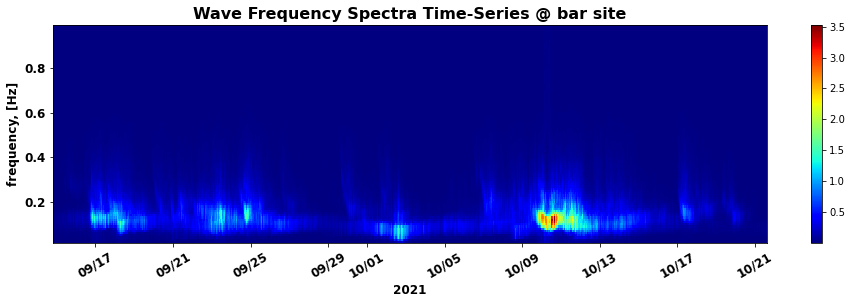

In [21]:
fig, ax = plt.subplots(1, 1, sharex = False, figsize = (16,4))

c = plt.pcolormesh(x, y, E, cmap='jet', shading='auto')
plt.title('Wave Frequency Spectra Time-Series @ bar site',fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 30)
plt.xticks(fontsize = 12)
plt.xticks(fontweight = 'bold')
plt.xlabel('2021', fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12)
plt.yticks(fontweight = 'bold')
plt.ylabel('frequency, [Hz]', fontsize = 12, fontweight = 'bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
fig.colorbar(c, ax=ax)

plt.savefig('1137bar_wavs_fspec_pcolor.png')


## Run-up calcs:

from Lange et al eqn [9]:

𝑅2%,𝐺 = 0.4 * 𝛽eff^0.45 ∫𝑆𝑆 𝐸^0.5 𝑓^−1.45 𝑑𝑓 + 

2 [3.72 * 𝛽eff^0.6 ∫𝑆𝑆 𝐸^0.95 𝑓^−0.25 𝑑𝑓 +0.76 * 𝛽f^2 * 𝛽eff^0.75 ∫𝑆𝑆 𝐸^0.4 𝑓^−3.1 𝑑𝑓]^0.5

term1 = 0.4 * 𝛽eff^0.45 ∫𝑆𝑆 𝐸^0.5 𝑓^−1.45 𝑑𝑓

term2 = 3.72 * 𝛽eff^0.6 ∫𝑆𝑆 𝐸^0.95 𝑓^−0.25 𝑑𝑓

term3 = 0.76 * 𝛽f^2 * 𝛽eff^0.75 ∫𝑆𝑆 𝐸^0.4 𝑓^−3.1 𝑑𝑓

where;

R2%,G = term1 + 2[term2 + term3]^0.5


In [22]:
Ess=WVS.sel(time=slice(dtstart, dtend), EnergySpectra_Frequency=slice(0.0399,0.25)).EnergySpectra

In [23]:
Hs=WVS.sel(time=slice(dtstart, dtend)).Height_Hm0

In [107]:
Tp=WVS.sel(time=slice(dtstart, dtend)).Period_Tp

In [25]:
time = dftime['time']

In [26]:
Ess[:,1853]

<xarray.DataArray 'EnergySpectra' (EnergySpectra_Frequency: 22)>
array([0.160879, 0.297968, 0.467733, 0.998673, 2.206895, 2.948998, 3.209639,
       3.44048 , 3.439992, 3.154914, 2.061084, 1.294497, 1.171092, 1.031172,
       0.941465, 0.936286, 0.922495, 0.826309, 0.881728, 0.813578, 0.669392,
       0.583988], dtype=float32)
Coordinates:
    time                     datetime64[ns] 2021-10-10T12:50:00.000999936
  * EnergySpectra_Frequency  (EnergySpectra_Frequency) float64 0.04 ... 0.25
Attributes:
    description:  
    units:        m^2/Hz

In [27]:
f=WVS.sel(EnergySpectra_Frequency = slice(0.0399,0.25)).EnergySpectra_Frequency

In [28]:
f

<xarray.DataArray 'EnergySpectra_Frequency' (EnergySpectra_Frequency: 22)>
array([0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11, 0.12, 0.13, 0.14, 0.15,
       0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22, 0.23, 0.24, 0.25])
Coordinates:
  * EnergySpectra_Frequency  (EnergySpectra_Frequency) float64 0.04 ... 0.25
Attributes:
    description:  
    units:        Hz

In [117]:
dff = 0.01
beta_f = np.arange(0.1,0.01,-0.02)
beta_eff = beta_f *  (1/ 5)

In [118]:
beta_f

array([0.1 , 0.08, 0.06, 0.04, 0.02])

In [119]:
beta_eff

array([0.02 , 0.016, 0.012, 0.008, 0.004])

In [120]:
R=np.empty(shape = [len(beta_f),len(time)])

In [121]:
for j in range(0,len(beta_f)):
    R2G=[]
        
    for i in range(0,len(Hs)):

            #term1 = 0.4 * 𝛽eff^0.45 ∫𝑆𝑆 𝐸^0.5 𝑓^−1.45 𝑑𝑓
            aint = Ess[:,i]**0.5 * f**-1.45 * dff
            term1 = 0.4 * beta_eff[j]**0.45 * aint.sum()
            #term1.append(a)

            #term2 = 3.72 * 𝛽eff^0.6 ∫𝑆𝑆 𝐸^0.95 𝑓^−0.25 𝑑𝑓
            bint = Ess[:,i]**0.95 * f**-0.25 * dff
            term2= 3.72 * beta_eff[j]**0.6 * bint.sum()
            #term2.append(b)

            #term3 = 0.76 * 𝛽f^2 * 𝛽eff^0.75 ∫𝑆𝑆 𝐸^0.4 𝑓^−3.1 𝑑𝑓
            cint = Ess[:,i]**0.4 * f**-3.1 * dff
            term3= 0.76 * beta_f[j]**2 * beta_eff[j]**0.75 * cint.sum()
            #term3.append(c)

            #R2%,G = term1 + 2[term2 + term3]^0.5
            r = term1 + 2*(term2+term3)**0.5
            R2G.append(r)
            
    R[j,:]=R2G

In [122]:
R[0,1853]

1.59237251495249

In [123]:
### Add Run-up calcs using Stockdon Eqn to compare:

In [124]:
import sys
sys.path.append('c:/users/ssuttles/git/csherwood/DUNEX')
import DUNEX_funcs

In [125]:
R2=np.empty(shape = [7,len(beta_f),len(time)])

In [126]:
for idx,val in enumerate(beta_f):
     R2[:,idx,:]= DUNEX_funcs.calcR2(Hs,Tp,val)

In [127]:
R2.shape

(7, 5, 2651)

In [128]:
R2[0,0,:]

array([0.36129916, 0.52120084, 0.57576835, ..., 0.66245466, 0.66667002,
       0.55557907])

In [129]:
dsR = xr.Dataset()
#times = [matlabtools.matlab2datetime(x, tz=None) for x in dat.mpltime]
dsR['time'] = xr.DataArray(dftime['time'], dims='time')
dsR['R2G'] = xr.DataArray(R, dims=('beta','time'))
dsR['R2'] = xr.DataArray(R2[0,:,:], dims=('beta','time'))

In [130]:
dsR

<xarray.Dataset>
Dimensions:  (beta: 5, time: 2651)
Coordinates:
  * time     (time) datetime64[ns] 2021-09-14T19:10:00.000999936 ... 2021-10-...
Dimensions without coordinates: beta
Data variables:
    R2G      (beta, time) float64 0.3458 0.4483 0.4534 ... 0.1057 0.106 0.1126
    R2       (beta, time) float64 0.3613 0.5212 0.5758 ... 0.3026 0.3045 0.2538

In [131]:
lstr=[]
for i in range(0,len(beta_f)):
        str = [r"$\beta_{f}$ =  %4.2f" % beta_f[i]]
        lstr = lstr + str

In [159]:
fig, ax = plt.subplots(1, 1, sharex = False, figsize = (16,4))
plt.plot(dsR.time,dsR.R2G[0,:], label = lstr[0])
plt.plot(dsR.time,dsR.R2G[1,:], label = lstr[1])
plt.plot(dsR.time,dsR.R2G[2,:], label = lstr[2])
plt.plot(dsR.time,dsR.R2G[3,:], label = lstr[3])
plt.plot(dsR.time,dsR.R2G[4,:], label = lstr[4])
plt.title('Run-up Calculations using Lange et al Eqn 9 w/ Wave Spectral data from bar site',fontsize = 16, fontweight = 'bold')
plt.xticks(rotation = 30)
plt.xticks(fontsize = 12)
plt.xticks(fontweight = 'bold')
plt.xlabel('2021', fontsize = 12, fontweight = 'bold')
plt.yticks(fontsize = 12)
plt.yticks(fontweight = 'bold')
plt.ylabel('meters', fontsize = 12, fontweight = 'bold')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
plt.legend(fontsize = 12)
plt.savefig('PI_runup_calcs_Lange_eqn9_wavspec_bar_site.png')

In [157]:
ax0.get_xticks

<bound method _AxesBase.get_xticks of <AxesSubplot:title={'center':'Run-up Calculations using Lange et al Eqn 9 w/ Wave Spectral data from bar site'}, xlabel='2021', ylabel='meters'>>

C:\Users\ssuttles\.conda\envs\stglib\lib\site-packages\ipykernel_launcher.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\ssuttles\.conda\envs\stglib\lib\site-packages\ipykernel_launcher.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
C:\Users\ssuttles\.conda\envs\stglib\lib\site-packages\ipykernel_launcher.py:26: UserWarning: FixedFormatter should only be used together with FixedLocator


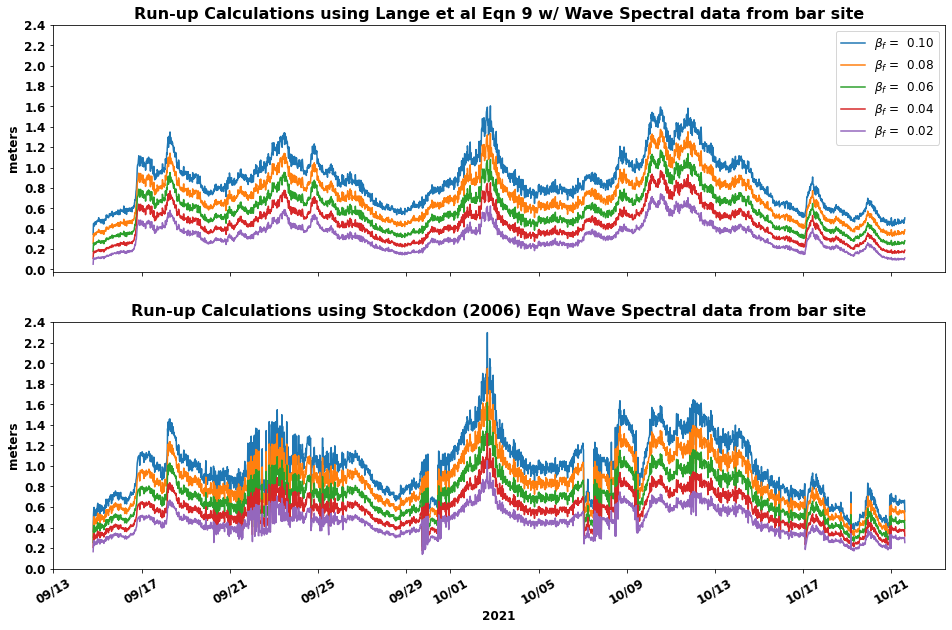

In [209]:
fig, ax = plt.subplots(2, 1, sharex = True, figsize = (16,10))
ax[0].plot(dsR.time,dsR.R2G[0,:], label = lstr[0])
ax[0].plot(dsR.time,dsR.R2G[1,:], label = lstr[1])
ax[0].plot(dsR.time,dsR.R2G[2,:], label = lstr[2])
ax[0].plot(dsR.time,dsR.R2G[3,:], label = lstr[3])
ax[0].plot(dsR.time,dsR.R2G[4,:], label = lstr[4])
ax[0].set_title('Run-up Calculations using Lange et al Eqn 9 w/ Wave Spectral data from bar site',fontsize = 16, fontweight = 'bold')
ytks=np.arange(0,2.5,0.2)
ax[0].set_yticks(ytks)
ax[0].set_yticklabels(ytks,fontsize = 12)
ax[0].set_yticklabels(ytks,fontweight = 'bold')
ax[0].set_ylabel('meters', fontsize = 12, fontweight = 'bold')
#ax[0].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax[0].yaxis.set_major_locator(ticker.FixedLocator(ytks))
ax[0].yaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
ax[0].legend(fontsize = 12)

ax[1].plot(dsR.time,dsR.R2[0,:], label = lstr[0])
ax[1].plot(dsR.time,dsR.R2[1,:], label = lstr[1])
ax[1].plot(dsR.time,dsR.R2[2,:], label = lstr[2])
ax[1].plot(dsR.time,dsR.R2[3,:], label = lstr[3])
ax[1].plot(dsR.time,dsR.R2[4,:], label = lstr[4])
ax[1].set_title('Run-up Calculations using Stockdon (2006) Eqn Wave Spectral data from bar site',fontsize = 16, fontweight = 'bold')
ax[1].set_xticklabels(ax[1].get_xticklabels(),rotation = 30)
ax[1].set_xticklabels(ax[1].get_xticklabels(),fontsize = 12)
ax[1].set_xticklabels(ax[1].get_xticklabels(),fontweight = 'bold')
ax[1].set_xlabel('2021', fontsize = 12, fontweight = 'bold')
ax[1].set_yticks(ytks)
ax[1].set_yticklabels(ytks,fontsize = 12)
ax[1].set_yticklabels(ytks,fontweight = 'bold')
ax[1].set_ylabel('meters', fontsize = 12, fontweight = 'bold')
xtks=ax[1].get_xticks()
ax[1].xaxis.set_major_locator(ticker.FixedLocator(xtks))
ax[1].xaxis.set_major_formatter(mdates.DateFormatter('%m/%d'))
ax[1].yaxis.set_major_locator(ticker.FixedLocator(ytks))
ax[1].yaxis.set_major_formatter(ticker.FormatStrFormatter("%3.1f"))
#ax[1].legend(fontsize = 12)


fig.savefig('PI_runup_calcs_Lange_eqn9_wavspec_bar_site_stockdon.png')

In [210]:
ax[1].get_xticks()

array([18883., 18887., 18891., 18895., 18899., 18901., 18905., 18909.,
       18913., 18917., 18921.])

## Try hvplot:

In [41]:
import hvplot.xarray 
import hvplot.pandas
from holoviews import opts

In [42]:
type(WVS)

xarray.core.dataset.Dataset

In [54]:
ds = xr.Dataset()

Need to extract into new dataset of variables with just time dim that want to plot using hvplot

In [55]:
ds['time']=WVS.sel(time=slice(dtstart, dtend)).time
ds['Hs']=WVS.sel(time=slice(dtstart, dtend)).Height_Hm0
ds['Hmax']=WVS.sel(time=slice(dtstart, dtend)).Height_Hmax
ds['Hmean']=WVS.sel(time=slice(dtstart, dtend)).Height_Hmean
ds['Tp']=WVS.sel(time=slice(dtstart, dtend)).Period_Tp
ds['Tm']=WVS.sel(time=slice(dtstart, dtend)).Period_Tm02
ds['Tmax']=WVS.sel(time=slice(dtstart, dtend)).Period_Tmax
ds['DirTp']=WVS.sel(time=slice(dtstart, dtend)).Direction_DirTp
ds['DirSprd']=WVS.sel(time=slice(dtstart, dtend)).Direction_SprTp
ds['Pres']=WVS.sel(time=slice(dtstart, dtend)).Pressure

In [236]:
df = ds.to_dataframe() #need to convert to pandas dataframe to plot multiple line on an axes

In [64]:
df['time']=WVS.sel(time=slice(dtstart, dtend)).time

In [65]:
df['dt'] = pd.to_datetime(df['time'], format='%m/%d/%Y %I:%M:%S %p')

In [66]:
Hplot= df.hvplot(x='time', y = ['Hs', 'Hmax', 'Hmean'], width= 900, ylim = [-0.1, 5],
                 title = 'Pea Island DUNEX @ bar site: Wave Heights',ylabel = 'meters',xlabel = 'mm/dd 2021' )

In [67]:
Hplot

:NdOverlay   [Variable]
   :Curve   [time]   (value)

In [69]:
Tplot= df.hvplot(x='time', y = ['Tp', 'Tm'], width= 900, ylim = [-0.1,20])

In [221]:
Tplot

:NdOverlay   [Variable]
   :Curve   [time]   (value)

In [229]:
ds_spec=xr.Dataset() #create xarray dataset of data wavespec data from Ocean Contour 

In [230]:
ds_spec['time']=xr.DataArray(WVS.sel(time=slice(dtstart, dtend)).time.values,dims='time')
ds_spec['frequency']=xr.DataArray(WVS.sel(time=slice(dtstart, dtend)).EnergySpectra_Frequency.values,dims='frequency')
ds_spec['energy']=xr.DataArray(WVS.sel(time=slice(dtstart, dtend)).EnergySpectra.values,dims=('frequency','time'))

In [235]:
ds_spec.hvplot.image(x='time', y='frequency', z='energy',cmap='jet',width=900)

:Image   [time,frequency]   (energy)

## Output results to netcdf files:

In [211]:
WVS.Height_Hm0.attrs

{'description': 'Hm0: Significant height; H3: AST mean height of the 33% largest waves; H10: AST mean height of ',
 'units': 'm'}

In [219]:
WVS.WaveSpectra_Vel.attrs

{'description': '', 'units': 'm^2/Hz'}